In [1]:
import sys
# setting path
sys.path.append('../')

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Ruta a las imágenes .tiff
TIFF_DIR = "/data/datasets/PANDA/PANDA_original/original/train_images"

# Listar los primeros 5 archivos .tiff del directorio
tiff_files = sorted([f for f in os.listdir(TIFF_DIR) if f.endswith(".tiff")])[:5]
assert len(tiff_files) >= 5, f"Se encontraron solo {len(tiff_files)} archivos TIFF"

# Mostrar cada imagen
plt.figure(figsize=(20, 10))
for i, filename in enumerate(tiff_files):
    img_path = os.path.join(TIFF_DIR, filename)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(filename[:8] + "...")

plt.suptitle("Primeras 5 imágenes TIFF del dataset", fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta a las imágenes .tiff
TIFF_DIR = "/data/datasets/PANDA/PANDA_original/original/train_images"

# Configuración de parches
GRID_ROWS = 6     # Número de filas de parches
GRID_COLS = 6     # Número de columnas de parches

# Obtener la primera imagen del dataset
tiff_files = sorted([f for f in os.listdir(TIFF_DIR) if f.endswith(".tiff")])
filename = tiff_files[0]

print(f"Procesando: {filename}")

# Cargar imagen original
img_path = os.path.join(TIFF_DIR, filename)
img_original = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

height_orig, width_orig = img_original_rgb.shape[:2]
print(f"Dimensiones originales: {width_orig}x{height_orig}")

# Calcular tamaño de parches basado en las dimensiones completas de la imagen
PATCH_WIDTH = width_orig // GRID_COLS
PATCH_HEIGHT = height_orig // GRID_ROWS

print(f"Tamaño de parche calculado: {PATCH_WIDTH}x{PATCH_HEIGHT}")
print(f"Grid: {GRID_ROWS}x{GRID_COLS} parches")

# 1. IMAGEN ORIGINAL LIMPIA
print("Generando imagen original limpia...")
plt.figure(figsize=(12, 12))
plt.imshow(img_original_rgb)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('01_original_clean.png', dpi=300, bbox_inches='tight', 
            pad_inches=0, facecolor='white')
plt.close()

# 2. IMAGEN ORIGINAL CON GRID SUPERPUESTO
print("Generando imagen original con grid...")
plt.figure(figsize=(12, 12))
plt.imshow(img_original_rgb)

# Dibujar grid superpuesto sobre toda la imagen
for i in range(GRID_ROWS + 1):
    y = i * PATCH_HEIGHT
    plt.axhline(y=y, color='red', linewidth=2, alpha=0.7)

for j in range(GRID_COLS + 1):
    x = j * PATCH_WIDTH
    plt.axvline(x=x, color='red', linewidth=2, alpha=0.7)

# Numerar los parches
for i in range(GRID_ROWS):
    for j in range(GRID_COLS):
        patch_num = i * GRID_COLS + j + 1
        center_x = j * PATCH_WIDTH + PATCH_WIDTH // 2
        center_y = i * PATCH_HEIGHT + PATCH_HEIGHT // 2
        plt.text(center_x, center_y, str(patch_num), 
                ha='center', va='center', fontsize=16, 
                color='yellow', weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('02_original_with_grid.png', dpi=300, bbox_inches='tight', 
            pad_inches=0, facecolor='white')
plt.close()

# 3. EXTRAER PARCHES INDIVIDUALES
print("Extrayendo parches individuales...")
patches_folder = "patches"
os.makedirs(patches_folder, exist_ok=True)

for i in range(GRID_ROWS):
    for j in range(GRID_COLS):
        # Calcular coordenadas del parche
        patch_start_y = i * PATCH_HEIGHT
        patch_end_y = (i + 1) * PATCH_HEIGHT
        patch_start_x = j * PATCH_WIDTH
        patch_end_x = (j + 1) * PATCH_WIDTH
        
        # Asegurar que no se salga de los límites
        patch_end_y = min(patch_end_y, height_orig)
        patch_end_x = min(patch_end_x, width_orig)
        
        # Extraer parche de la imagen original
        patch = img_original_rgb[patch_start_y:patch_end_y, patch_start_x:patch_end_x]
        
        # Guardar parche individual
        patch_num = i * GRID_COLS + j + 1
        patch_filename = f'{patches_folder}/patch_{patch_num:02d}.png'
        
        plt.figure(figsize=(8, 8))
        plt.imshow(patch)
        plt.axis('off')
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        plt.savefig(patch_filename, dpi=300, bbox_inches='tight', 
                    pad_inches=0, facecolor='white')
        plt.close()
        
        print(f"Parche {patch_num:02d} guardado: {patch.shape[1]}x{patch.shape[0]} píxeles")

print("\n=== ARCHIVOS GENERADOS ===")
print("1. 01_original_clean.png - Imagen original sin elementos adicionales")
print("2. 02_original_with_grid.png - Imagen original con grid completo superpuesto")
print(f"3. Carpeta 'patches/' - {GRID_ROWS*GRID_COLS} parches individuales")
print(f"   - patch_01.png a patch_{GRID_ROWS*GRID_COLS:02d}.png")
print(f"\nConfiguración utilizada:")
print(f"- Tamaño de parche: {PATCH_WIDTH}x{PATCH_HEIGHT} píxeles")
print(f"- Grid: {GRID_ROWS}x{GRID_COLS} parches")
print(f"- Cobertura: Imagen completa ({width_orig}x{height_orig} píxeles)")

Procesando: 0005f7aaab2800f6170c399693a96917.tiff
Dimensiones originales: 27648x29440
Tamaño de parche calculado: 4608x4906
Grid: 6x6 parches
Generando imagen original limpia...
Generando imagen original con grid...
Extrayendo parches individuales...
Parche 01 guardado: 4608x4906 píxeles
Parche 02 guardado: 4608x4906 píxeles
Parche 03 guardado: 4608x4906 píxeles
Parche 04 guardado: 4608x4906 píxeles
Parche 05 guardado: 4608x4906 píxeles
Parche 06 guardado: 4608x4906 píxeles
Parche 07 guardado: 4608x4906 píxeles
Parche 08 guardado: 4608x4906 píxeles
Parche 09 guardado: 4608x4906 píxeles
Parche 10 guardado: 4608x4906 píxeles
Parche 11 guardado: 4608x4906 píxeles
Parche 12 guardado: 4608x4906 píxeles
Parche 13 guardado: 4608x4906 píxeles
Parche 14 guardado: 4608x4906 píxeles
Parche 15 guardado: 4608x4906 píxeles
Parche 16 guardado: 4608x4906 píxeles
Parche 17 guardado: 4608x4906 píxeles
Parche 18 guardado: 4608x4906 píxeles
Parche 19 guardado: 4608x4906 píxeles
Parche 20 guardado: 4608x49

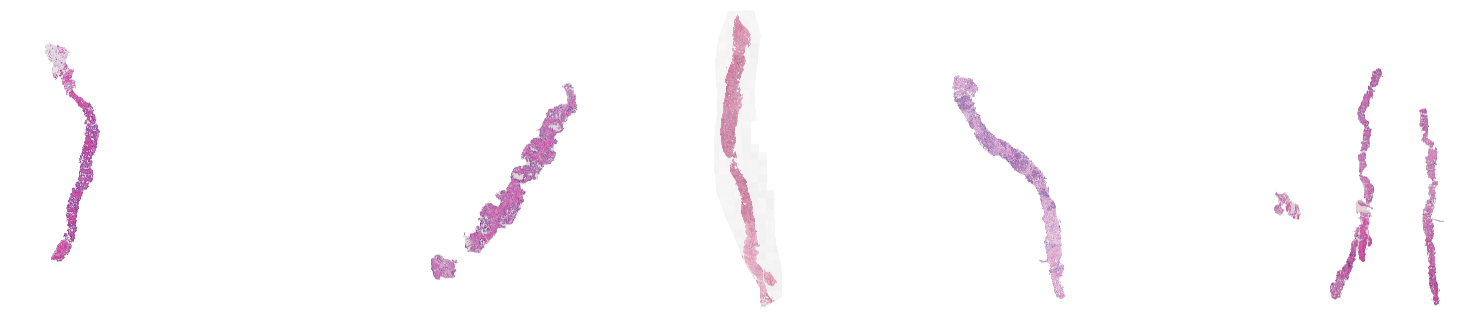

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta a las imágenes .tiff
TIFF_DIR = "/data/datasets/PANDA/PANDA_original/original/train_images"

# Listar los primeros 5 archivos .tiff del directorio
tiff_files = sorted([f for f in os.listdir(TIFF_DIR) if f.endswith(".tiff")])[:5]
assert len(tiff_files) >= 5, f"Se encontraron solo {len(tiff_files)} archivos TIFF"

# Configurar el estilo para publicación
plt.style.use('default')
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Ajustar espaciado
plt.subplots_adjust(wspace=0.02, hspace=0)

for i, filename in enumerate(tiff_files):
    img_path = os.path.join(TIFF_DIR, filename)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Mostrar imagen sin bordes ni ejes
    axes[i].imshow(img_rgb)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)

# Remover espacios en blanco alrededor de la figura
plt.tight_layout(pad=0)

# Guardar con alta resolución para paper
plt.savefig('histopathology_samples.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


/tmp/ipykernel_984082/2050148859.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=device))


Modelo MIL cargado desde: /home/javitrucas/TFG/notebooks/models/panda/model_attention.pth
Capa de proyección creada: 2048 -> 1024

Buscando 5 WSI positivas y 5 WSI negativas correctamente etiquetadas...


Procesando WSI:   0%|          | 0/10616 [00:00<?, ?it/s]

Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/0005f7aaab2800f6170c399693a96917_heatmap.png


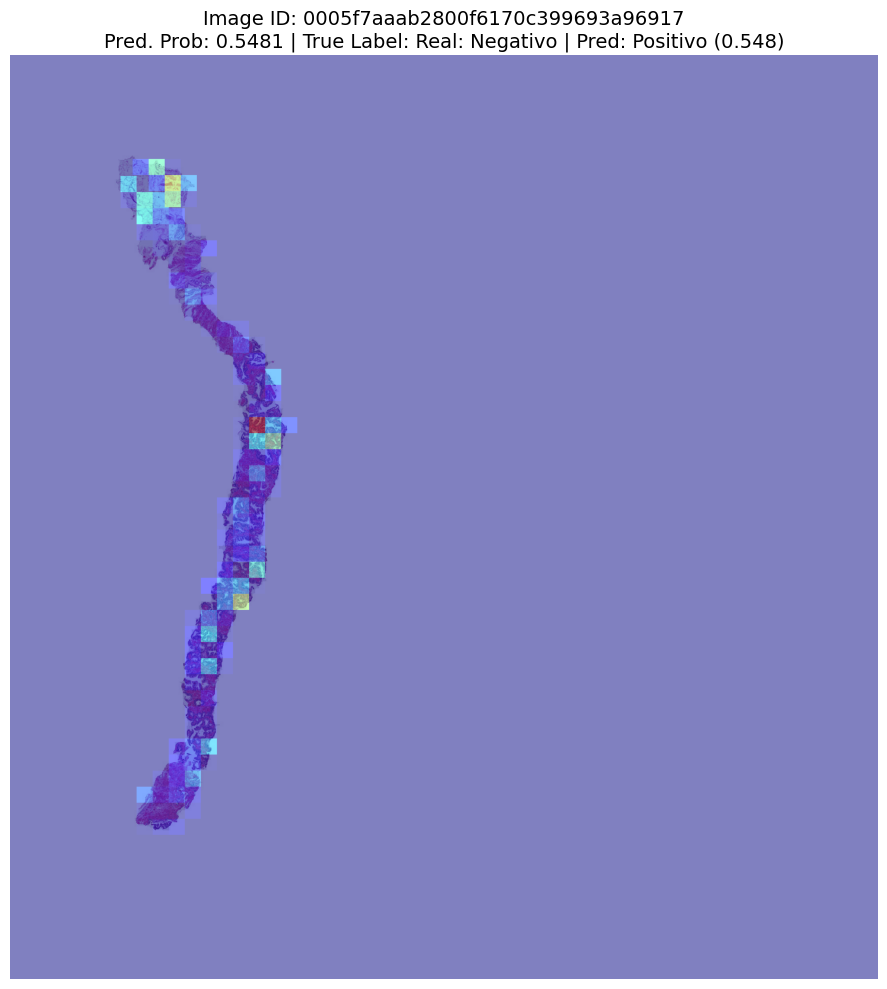

Procesando WSI:   0%|          | 1/10616 [00:05<16:20:41,  5.54s/it]

❌ Negative incorrectamente clasificado: 0005f7aaab2800f6170c399693a96917 (Real: 0, Pred: 0.548) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/000920ad0b612851f8e01bcc880d9b3d_heatmap.png


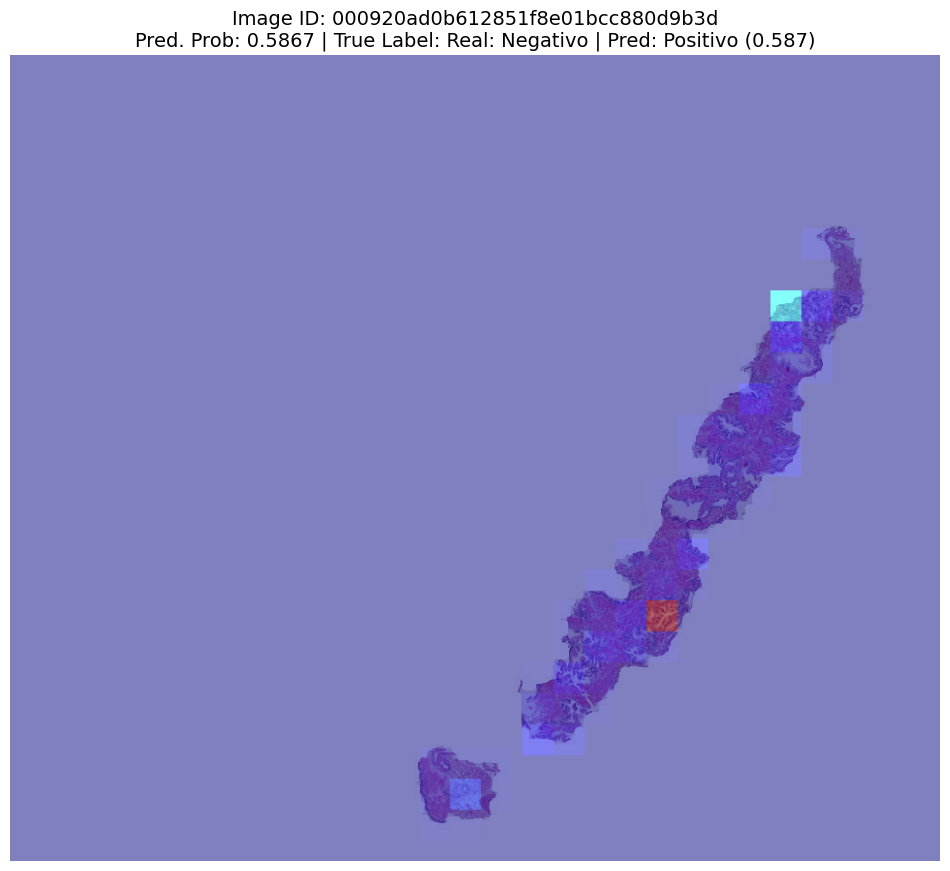

Procesando WSI:   0%|          | 2/10616 [00:09<14:04:20,  4.77s/it]

❌ Negative incorrectamente clasificado: 000920ad0b612851f8e01bcc880d9b3d (Real: 0, Pred: 0.587) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/0018ae58b01bdadc8e347995b69f99aa_heatmap.png


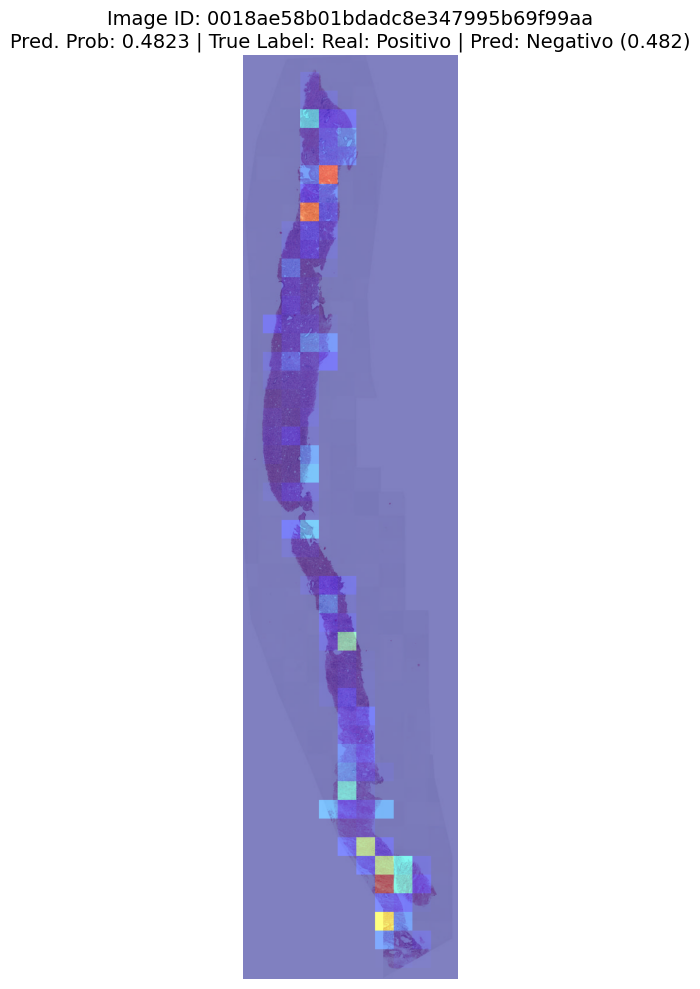

Procesando WSI:   0%|          | 3/10616 [00:12<11:16:40,  3.83s/it]

❌ Positive incorrectamente clasificado: 0018ae58b01bdadc8e347995b69f99aa (Real: 4, Pred: 0.482) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/001c62abd11fa4b57bf7a6c603a11bb9_heatmap.png


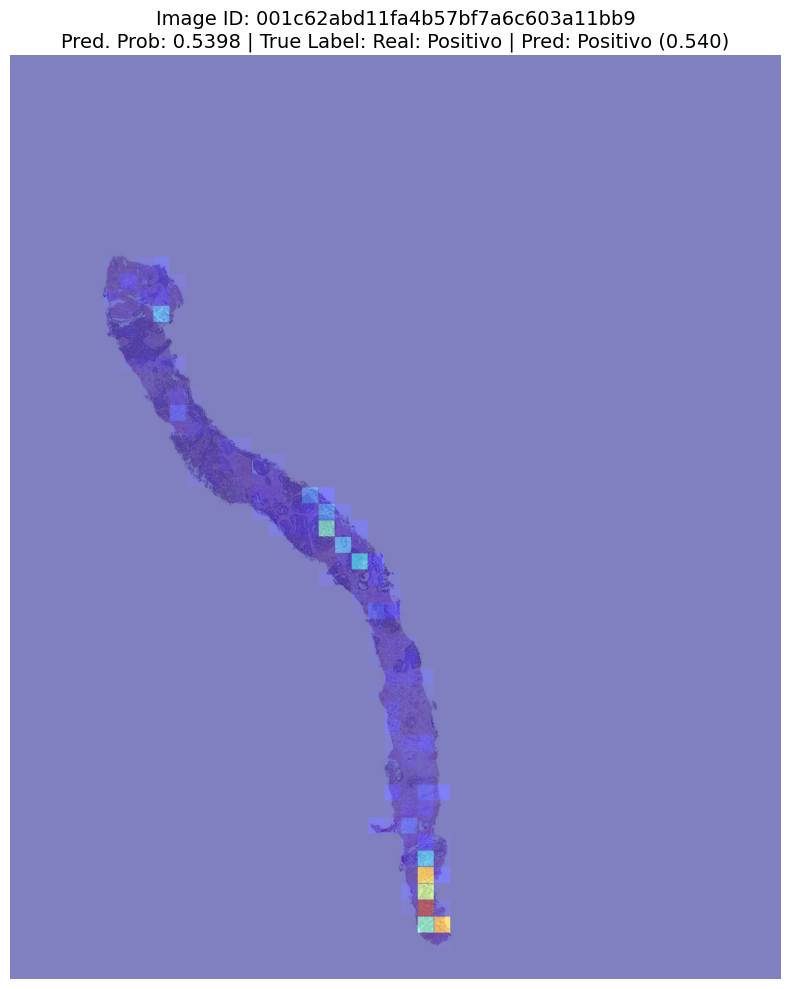

Procesando WSI:   0%|          | 4/10616 [00:17<12:16:08,  4.16s/it]

✅ Positive correctamente clasificado: 001c62abd11fa4b57bf7a6c603a11bb9 (Real: 4, Pred: 0.540)
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/001d865e65ef5d2579c190a0e0350d8f_heatmap.png


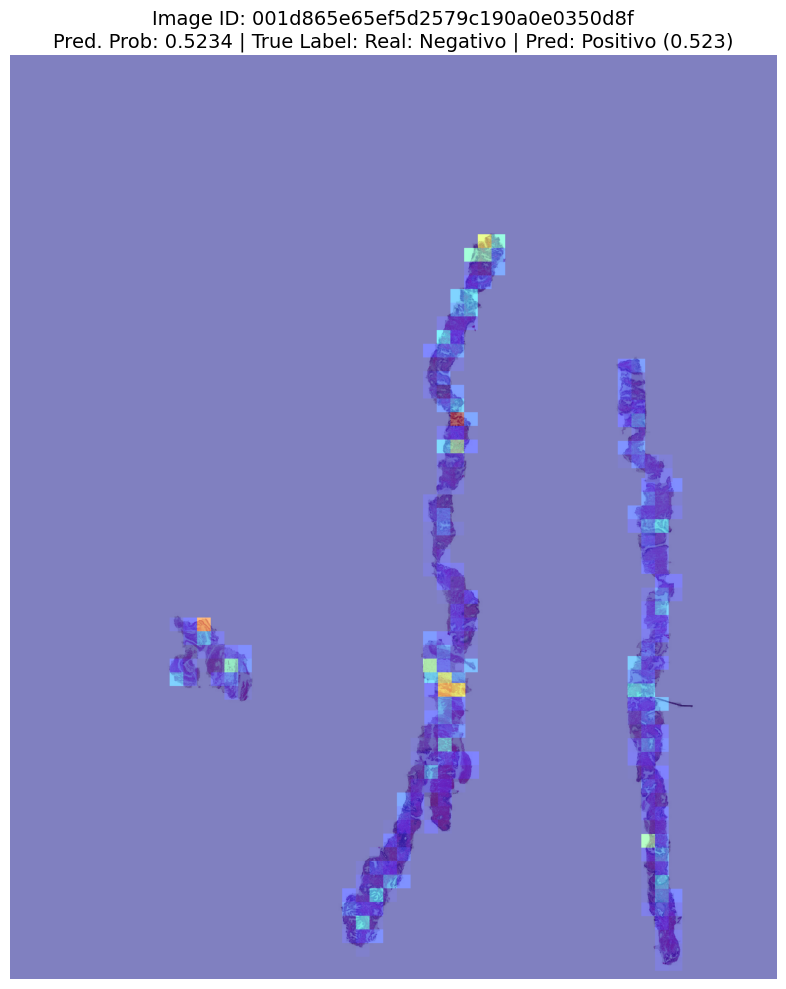

Procesando WSI:   0%|          | 5/10616 [00:22<13:23:12,  4.54s/it]

❌ Negative incorrectamente clasificado: 001d865e65ef5d2579c190a0e0350d8f (Real: 0, Pred: 0.523) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/002a4db09dad406c85505a00fb6f6144_heatmap.png


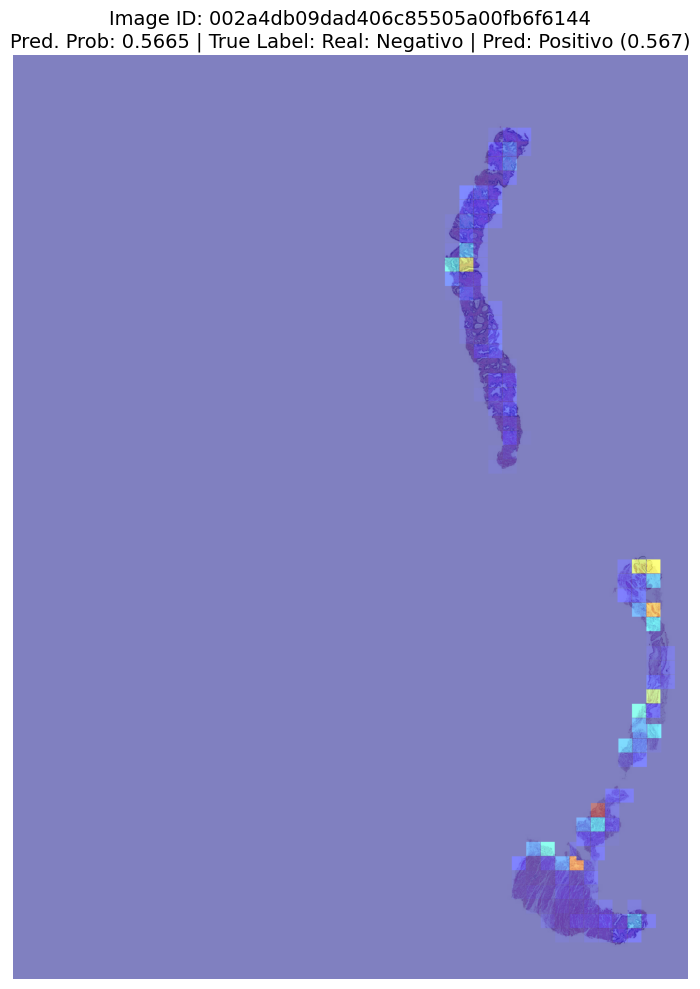

Procesando WSI:   0%|          | 6/10616 [00:26<13:18:14,  4.51s/it]

❌ Negative incorrectamente clasificado: 002a4db09dad406c85505a00fb6f6144 (Real: 0, Pred: 0.567) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/003046e27c8ead3e3db155780dc5498e_heatmap.png


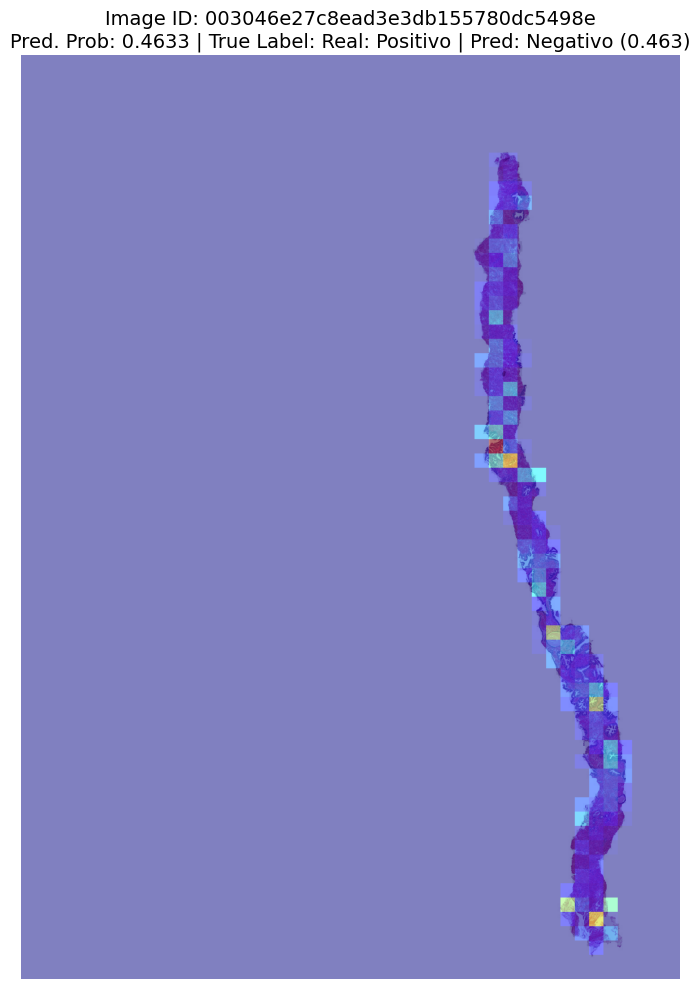

Procesando WSI:   0%|          | 7/10616 [00:31<13:13:14,  4.49s/it]

❌ Positive incorrectamente clasificado: 003046e27c8ead3e3db155780dc5498e (Real: 1, Pred: 0.463) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/0032bfa835ce0f43a92ae0bbab6871cb_heatmap.png


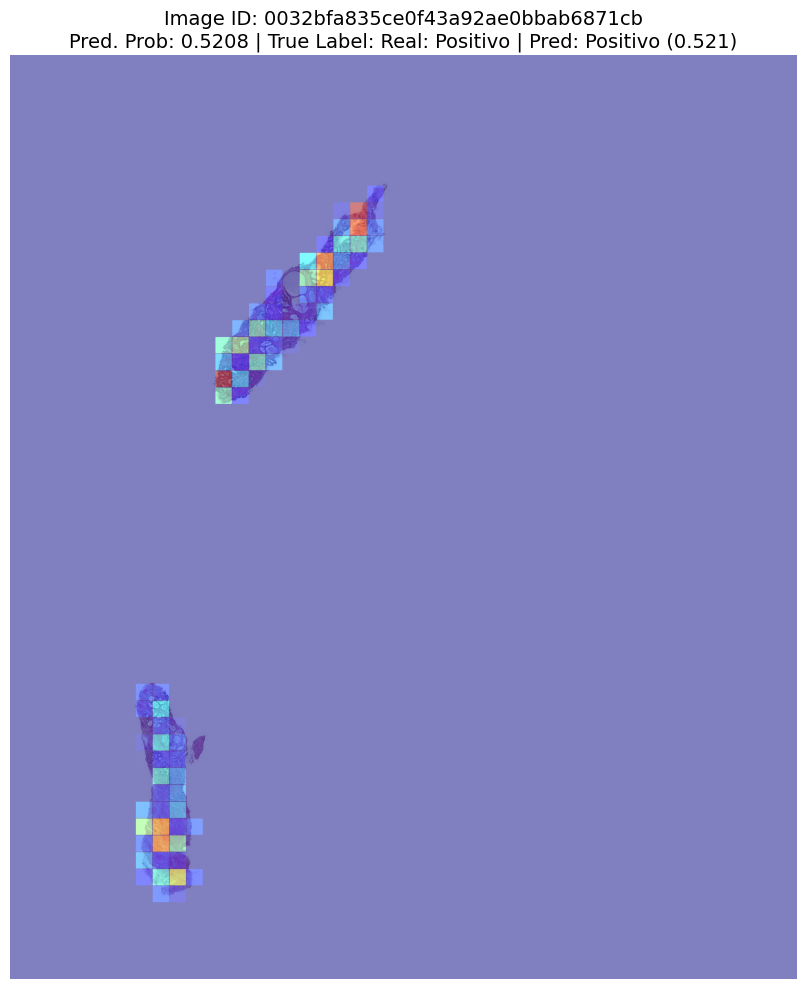

Procesando WSI:   0%|          | 8/10616 [00:35<13:12:57,  4.49s/it]

✅ Positive correctamente clasificado: 0032bfa835ce0f43a92ae0bbab6871cb (Real: 1, Pred: 0.521)
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/003a91841da04a5a31f808fb5c21538a_heatmap.png


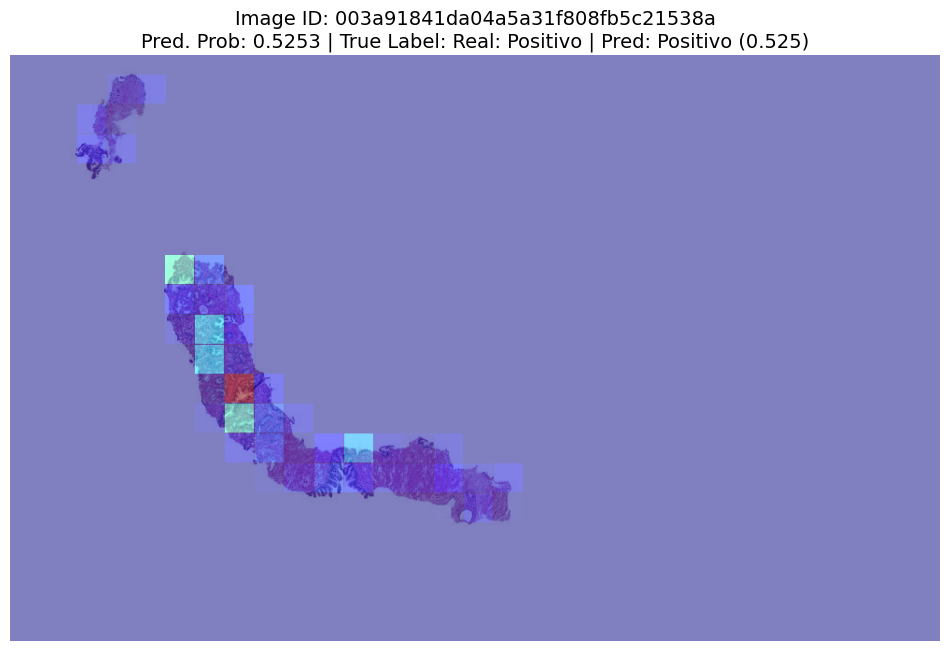

Procesando WSI:   0%|          | 9/10616 [00:38<12:01:35,  4.08s/it]

✅ Positive correctamente clasificado: 003a91841da04a5a31f808fb5c21538a (Real: 1, Pred: 0.525)
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/003d4dd6bd61221ebc0bfb9350db333f_heatmap.png


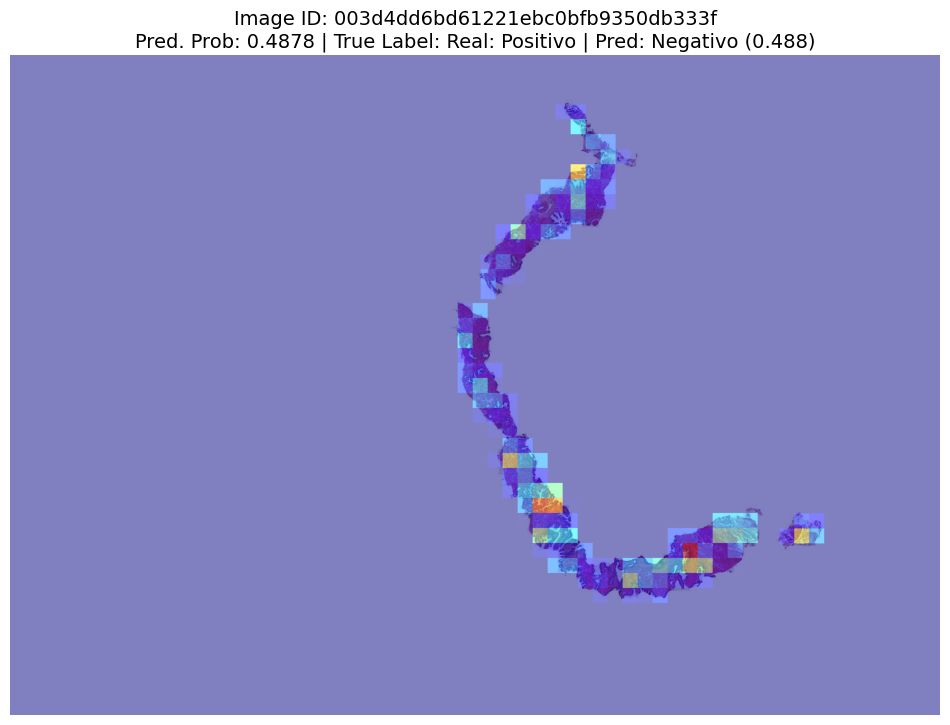

Procesando WSI:   0%|          | 10/10616 [00:43<12:13:28,  4.15s/it]

❌ Positive incorrectamente clasificado: 003d4dd6bd61221ebc0bfb9350db333f (Real: 1, Pred: 0.488) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/00412139e6b04d1e1cee8421f38f6e90_heatmap.png


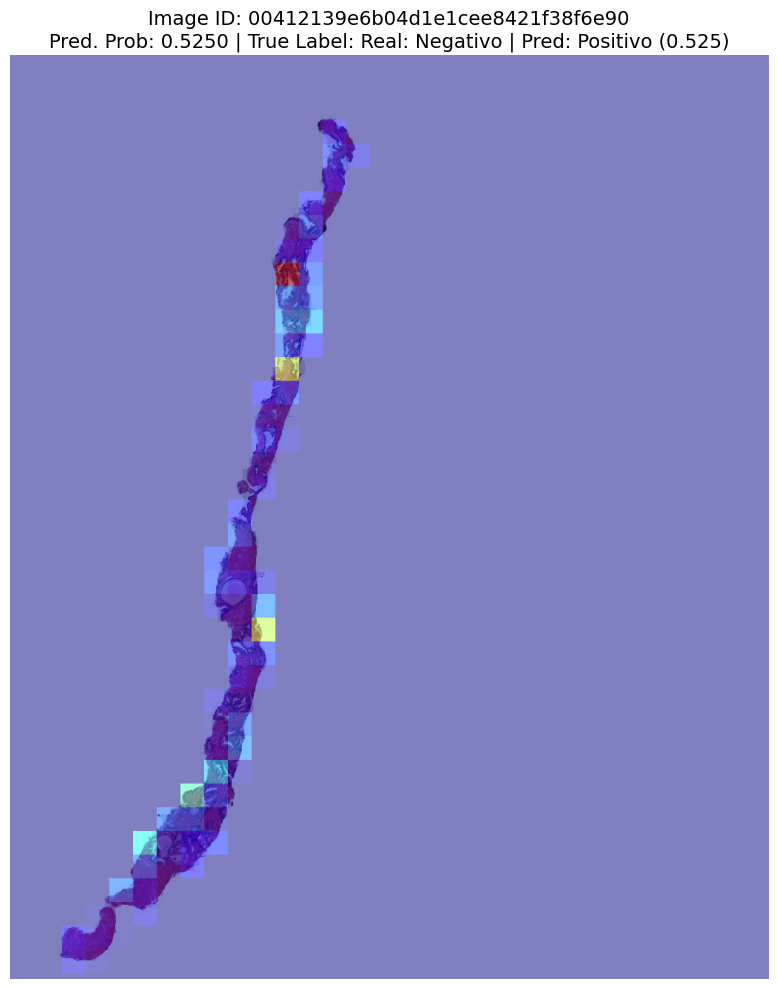

Procesando WSI:   0%|          | 11/10616 [00:47<12:14:33,  4.16s/it]

❌ Negative incorrectamente clasificado: 00412139e6b04d1e1cee8421f38f6e90 (Real: 0, Pred: 0.525) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/004391d48d58b18156f811087cd38abf_heatmap.png


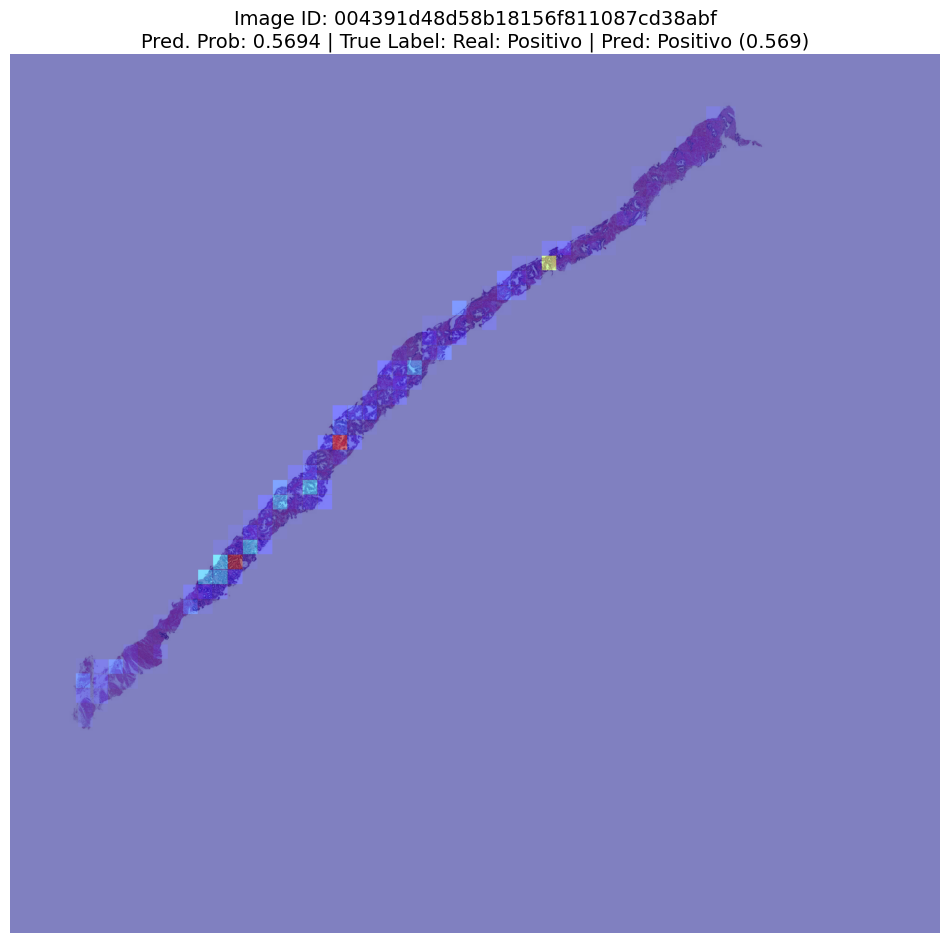

Procesando WSI:   0%|          | 12/10616 [00:52<13:22:33,  4.54s/it]

✅ Positive correctamente clasificado: 004391d48d58b18156f811087cd38abf (Real: 1, Pred: 0.569)
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/004dd32d9cd167d9cc31c13b704498af_heatmap.png


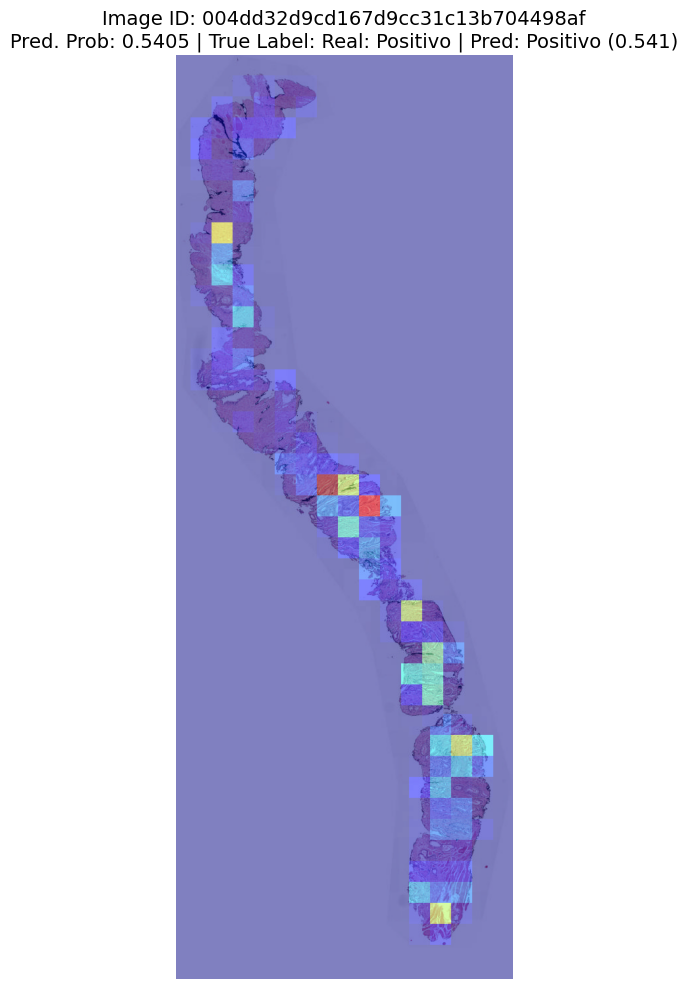

Procesando WSI:   0%|          | 13/10616 [00:56<12:12:58,  4.15s/it]

✅ Positive correctamente clasificado: 004dd32d9cd167d9cc31c13b704498af (Real: 1, Pred: 0.541)
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/006f4d8d3556dd21f6424202c2d294a9_heatmap.png


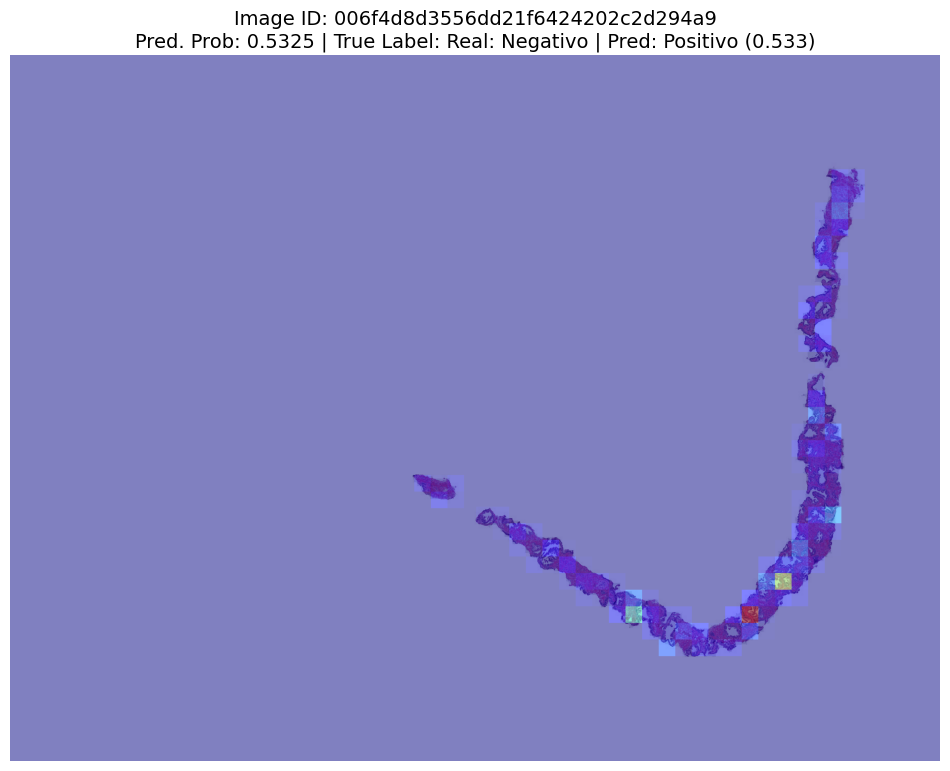

Procesando WSI:   0%|          | 17/10616 [01:00<6:30:51,  2.21s/it] 

❌ Negative incorrectamente clasificado: 006f4d8d3556dd21f6424202c2d294a9 (Real: 0, Pred: 0.533) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/007433133235efc27a39f11df6940829_heatmap.png


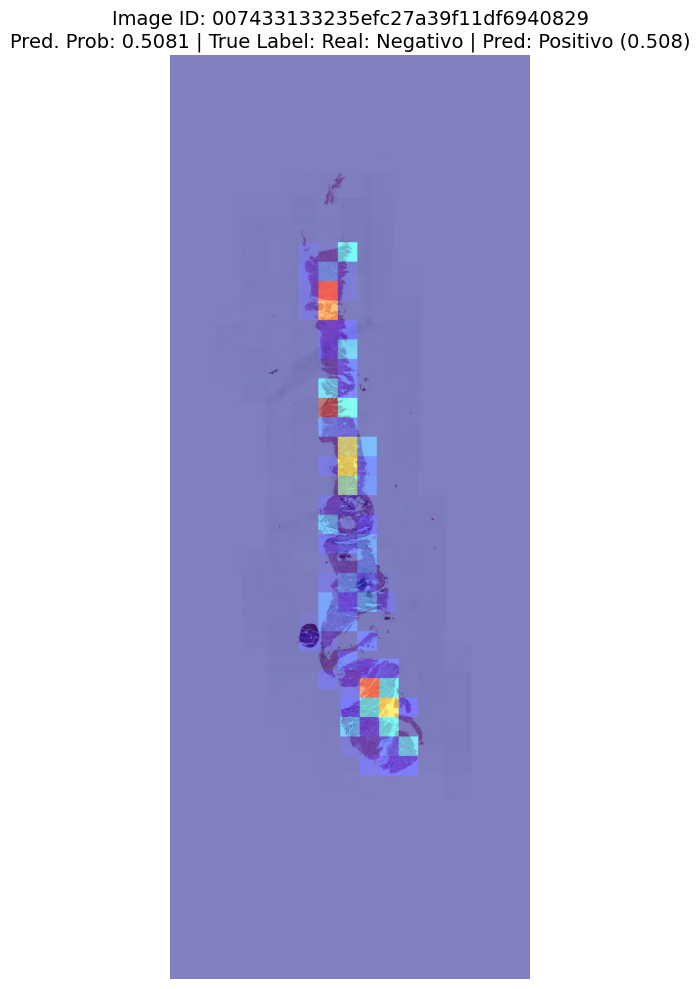

Procesando WSI:   0%|          | 23/10616 [01:03<3:07:49,  1.06s/it]

❌ Negative incorrectamente clasificado: 007433133235efc27a39f11df6940829 (Real: 0, Pred: 0.508) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/00a76bfbec239fd9f465d6581806ff42_heatmap.png


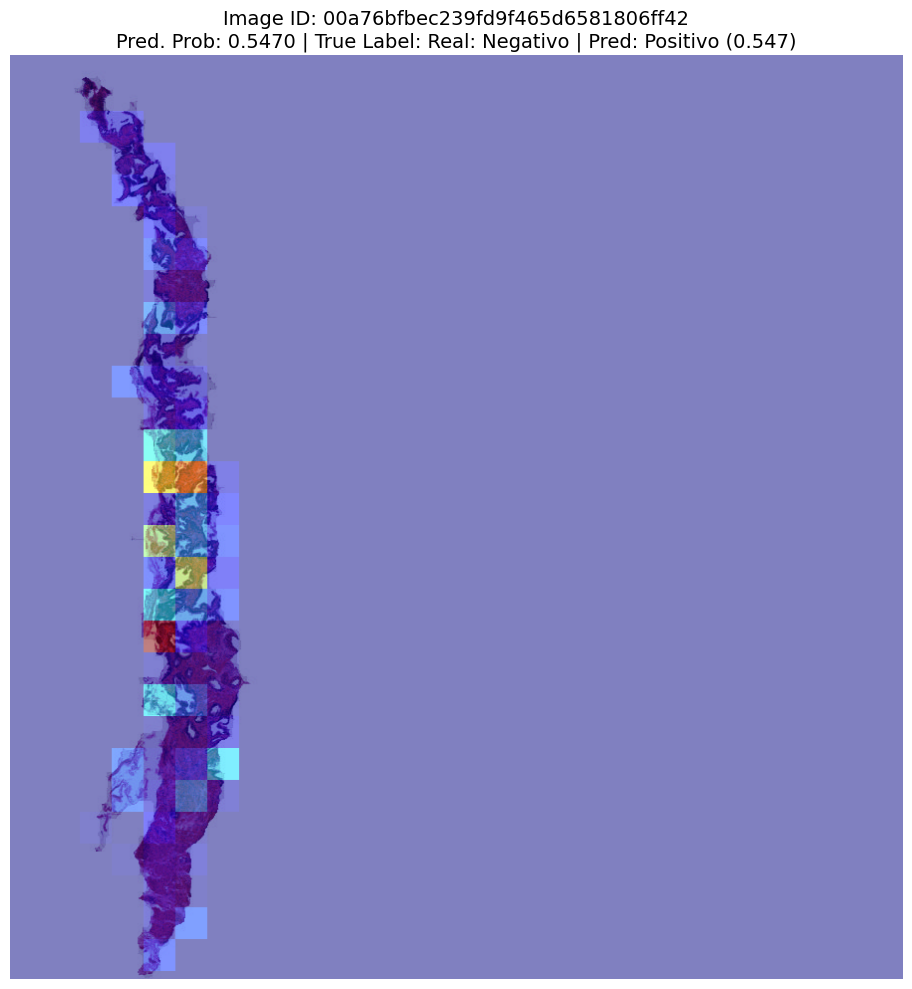

Procesando WSI:   0%|          | 31/10616 [01:08<2:04:28,  1.42it/s]

❌ Negative incorrectamente clasificado: 00a76bfbec239fd9f465d6581806ff42 (Real: 0, Pred: 0.547) - Saltando...


Procesando WSI:   0%|          | 46/10616 [01:08<38:29,  4.58it/s]  

Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/01642d24ac5520681d6a20f6c42dc4fe_heatmap.png


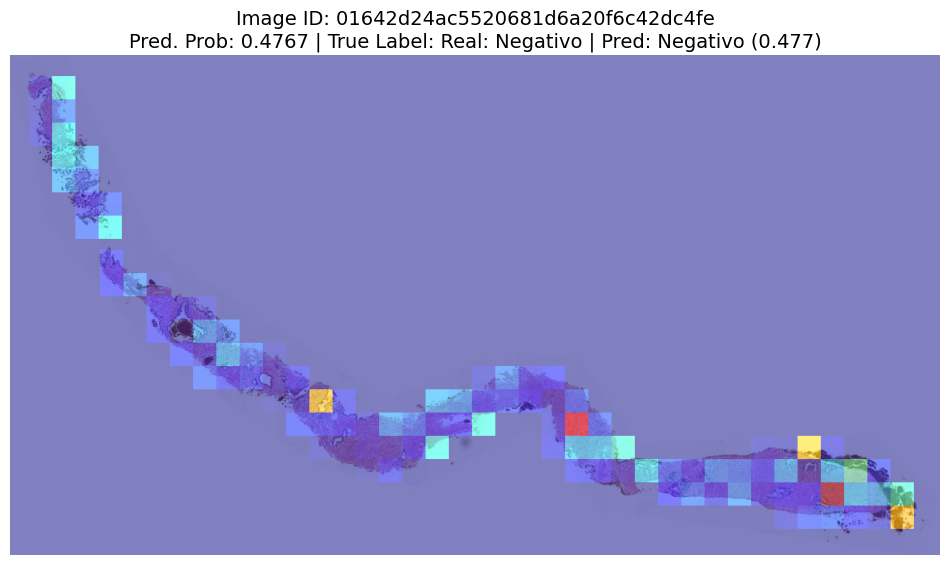

Procesando WSI:   0%|          | 51/10616 [01:12<1:01:22,  2.87it/s]

✅ Negative correctamente clasificado: 01642d24ac5520681d6a20f6c42dc4fe (Real: 0, Pred: 0.477)
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/01699a34381500901408ba3258f5c61a_heatmap.png


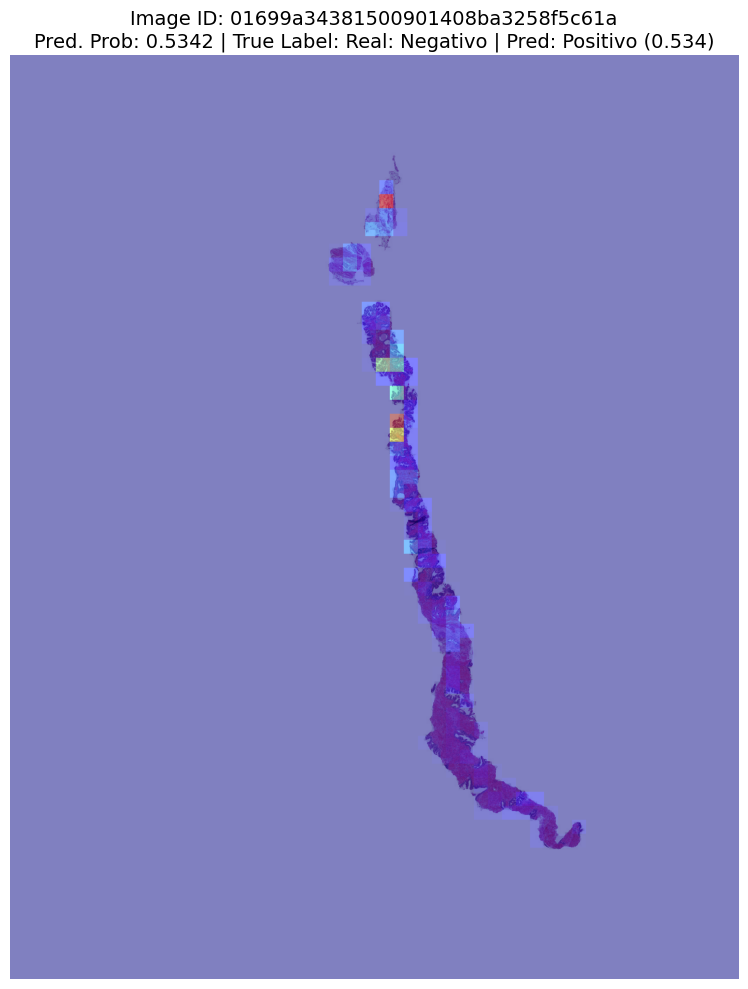

Procesando WSI:   1%|          | 54/10616 [01:16<1:42:41,  1.71it/s]

❌ Negative incorrectamente clasificado: 01699a34381500901408ba3258f5c61a (Real: 0, Pred: 0.534) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/019c1b40e6ec7410e8356c5d8d487954_heatmap.png


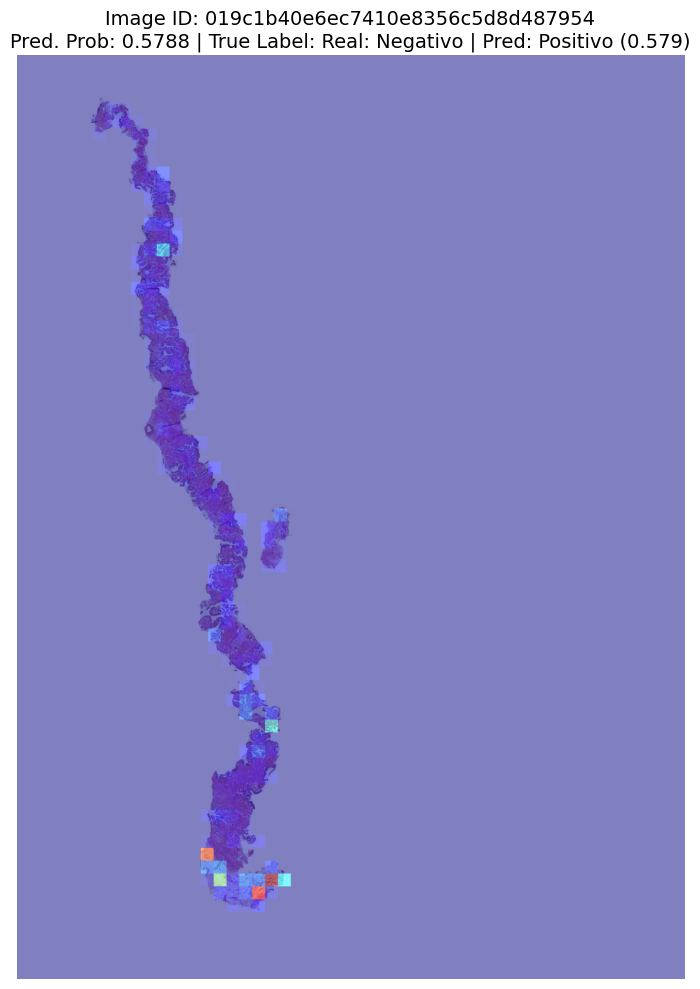

Procesando WSI:   1%|          | 57/10616 [01:21<2:20:54,  1.25it/s]

❌ Negative incorrectamente clasificado: 019c1b40e6ec7410e8356c5d8d487954 (Real: 0, Pred: 0.579) - Saltando...
Heatmap guardado en: /home/javitrucas/TFG/results/panda_heatmaps/01c3fb23ddaec7c51e1c0b52450bb472_heatmap.png


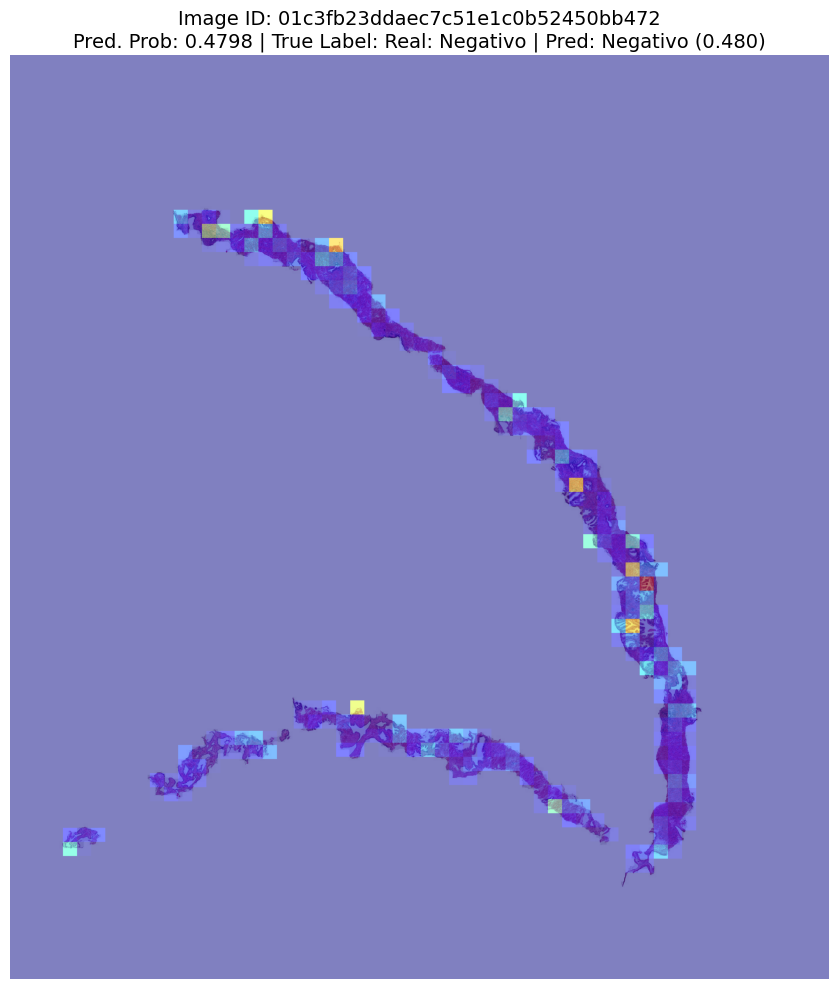

Procesando WSI:   1%|          | 64/10616 [01:27<2:20:06,  1.26it/s]

✅ Negative correctamente clasificado: 01c3fb23ddaec7c51e1c0b52450bb472 (Real: 0, Pred: 0.480)


In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import torch
from tqdm import tqdm
from PIL import Image
import openslide
from argparse import Namespace
import torch.nn as nn
import h5py

# Aumentar límite de PIL para imágenes grandes
Image.MAX_IMAGE_PIXELS = None

# --- CONFIGURACIÓN DE RUTAS E IMPORTACIONES ---
project_root = "/home/javitrucas/TFG"
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from scripts.model import MILModel
    from scripts.plot_utils import plot_wsi_and_heatmap, normalize
except (ImportError, ModuleNotFoundError) as e:
    print(f"Error importando módulos: {e}")
    print("Asegúrate de que la estructura de tu proyecto y el `sys.path` son correctos.")
    sys.exit()

# --- Configuración de guardado y paths ---
SAVE = True
SAVE_PATH = '/home/javitrucas/TFG/results/panda_heatmaps/'
SAVE_EXTENSION = 'png'
os.makedirs(SAVE_PATH, exist_ok=True)
plt.rcParams.update({'font.size': 16})  # Reducido para imágenes más limpias

DATA_DIR = '/data/datasets/PANDA/PANDA_original/original/'
TRAIN_IMAGES_DIR = os.path.join(DATA_DIR, 'train_images')
CSV_PATH = os.path.join(DATA_DIR, 'train.csv')
MODEL_PATH = '/home/javitrucas/TFG/notebooks/models/panda/model_attention.pth'

# --- Parámetros de Extracción y Modelo ---
PATCH_SIZE = 512
MAX_PATCHES = 2000
INPUT_FEATURE_DIM_ACTUAL = 2048
INPUT_FEATURE_DIM_MODEL_EXPECTS = 1024
FEATURE_DIM = 128

# --- Parámetros de Visualización ---
WSI_LEVEL_FOR_THUMBNAIL = 2
NUM_POSITIVE_SAMPLES = 5  # Número de muestras positivas a procesar
NUM_NEGATIVE_SAMPLES = 5  # Número de muestras negativas a procesar
PREDICTION_THRESHOLD = 0.5  # Umbral para considerar una predicción como positiva

# --- PATHS PARA FEATURES Y COORDENADAS ---
PANDA_FEATURES_ROOT = '/data/datasets/PANDA/PANDA_original/patches_512_preset/features_resnet50/'
PANDA_COORDS_ROOT = '/data/datasets/PANDA/PANDA_original/patches_512_preset/coords/'

# --- 1. CARGAR MODELO ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MILModel(
    pooling_type='attention',
    input_feature_dim=INPUT_FEATURE_DIM_MODEL_EXPECTS,
    feature_dim=FEATURE_DIM
)

try:
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.to(device)
    model.eval()
    print(f"Modelo MIL cargado desde: {MODEL_PATH}")
except Exception as e:
    print(f"ERROR al cargar el modelo: {e}")
    sys.exit()

feature_projector = nn.Linear(INPUT_FEATURE_DIM_ACTUAL, INPUT_FEATURE_DIM_MODEL_EXPECTS).to(device)
print(f"Capa de proyección creada: {INPUT_FEATURE_DIM_ACTUAL} -> {INPUT_FEATURE_DIM_MODEL_EXPECTS}")

# --- 2. FUNCIÓN PARA PROCESAR UNA WSI ---
def process_wsi(image_id, true_isup_grade):
    """Procesa una WSI y genera su mapa de calor."""
    
    features_file_path = os.path.join(PANDA_FEATURES_ROOT, f"{image_id}.npy")
    coords_file_path = os.path.join(PANDA_COORDS_ROOT, f"{image_id}.h5")
    wsi_path = os.path.join(TRAIN_IMAGES_DIR, f"{image_id}.tiff")
    
    try:
        # Cargar features
        features_np = np.load(features_file_path)
        if features_np.shape[0] > MAX_PATCHES:
            features_np = features_np[:MAX_PATCHES]
        features_tensor = torch.from_numpy(features_np).float().to(device)
        
        # Cargar coordenadas
        with h5py.File(coords_file_path, 'r') as f:
            coords = f['coords'][:]
        
        if coords.shape[0] != features_tensor.shape[0]:
            coords = coords[:features_tensor.shape[0]]
        
        # Calcular predicción y atención
        with torch.no_grad():
            projected_features = feature_projector(features_tensor)
            bag_tensor = projected_features.unsqueeze(0)
            prediction, attention_weights = model(bag_tensor)
            
            attention_weights = attention_weights.squeeze(0).cpu().numpy()
            prediction_prob = torch.sigmoid(prediction).item()
        
        normalized_attention = normalize(attention_weights)
        
        # Cargar WSI thumbnail
        slide = openslide.OpenSlide(wsi_path)
        thumbnail_dims = slide.level_dimensions[WSI_LEVEL_FOR_THUMBNAIL]
        wsi_thumbnail = slide.read_region((0, 0), WSI_LEVEL_FOR_THUMBNAIL, thumbnail_dims)
        wsi_thumbnail = np.array(wsi_thumbnail)[:, :, :3]
        downsample_factor = slide.level_downsamples[WSI_LEVEL_FOR_THUMBNAIL]
        slide.close()
        
        # Determinar etiquetas para el título
        true_label_str = "Positivo" if true_isup_grade > 0 else "Negativo"
        pred_label_str = "Positivo" if prediction_prob >= PREDICTION_THRESHOLD else "Negativo"
        
        # Crear título limpio
        title = f"Real: {true_label_str} | Pred: {pred_label_str} ({prediction_prob:.3f})"
        
        # Generar mapa de calor
        plot_wsi_and_heatmap(
            wsi_image=wsi_thumbnail,
            attention_scores=normalized_attention,
            patch_coords=coords,
            patch_size=PATCH_SIZE,
            level_downsample_factor=downsample_factor,
            image_id=image_id,  # Para el nombre del archivo
            pred_prob=prediction_prob,
            true_label=title,  # Título limpio
            save_path=SAVE_PATH if SAVE else None,
            save_extension=SAVE_EXTENSION
        )
        
        return True, prediction_prob, true_isup_grade
        
    except Exception as e:
        print(f"Error procesando {image_id}: {e}")
        return False, None, None

# --- 3. BUSCAR Y PROCESAR WSI CORRECTAMENTE ETIQUETADAS ---
try:
    df_train = pd.read_csv(CSV_PATH)
except Exception as e:
    print(f"ERROR: No se pudo cargar train.csv: {e}")
    sys.exit()

print(f"\nBuscando {NUM_POSITIVE_SAMPLES} WSI positivas y {NUM_NEGATIVE_SAMPLES} WSI negativas correctamente etiquetadas...")

positive_processed = 0
negative_processed = 0
total_processed = 0

# Estadísticas
correctly_classified = 0
total_valid = 0

for idx, row in tqdm(df_train.iterrows(), total=df_train.shape[0], desc="Procesando WSI"):
    if positive_processed >= NUM_POSITIVE_SAMPLES and negative_processed >= NUM_NEGATIVE_SAMPLES:
        break
    
    image_id = row['image_id']
    isup_grade = row['isup_grade']
    
    # Verificar existencia de archivos
    features_file = os.path.join(PANDA_FEATURES_ROOT, f"{image_id}.npy")
    coords_file = os.path.join(PANDA_COORDS_ROOT, f"{image_id}.h5")
    
    if not (os.path.exists(features_file) and os.path.exists(coords_file)):
        continue
    
    # Verificar dimensiones de features rápidamente
    try:
        temp_features = np.load(features_file)
        if temp_features.shape[1] != INPUT_FEATURE_DIM_ACTUAL:
            continue
    except:
        continue
    
    # Procesar según el tipo de muestra que necesitemos
    should_process = False
    
    if isup_grade > 0 and positive_processed < NUM_POSITIVE_SAMPLES:
        # Buscar positivos correctamente clasificados
        should_process = True
        target_type = "positive"
    elif isup_grade == 0 and negative_processed < NUM_NEGATIVE_SAMPLES:
        # Buscar negativos correctamente clasificados
        should_process = True
        target_type = "negative"
    
    if should_process:
        success, pred_prob, true_grade = process_wsi(image_id, isup_grade)
        
        if success:
            total_valid += 1
            
            # Verificar si está correctamente clasificado
            is_correct = False
            if target_type == "positive" and pred_prob >= PREDICTION_THRESHOLD:
                is_correct = True
                positive_processed += 1
            elif target_type == "negative" and pred_prob < PREDICTION_THRESHOLD:
                is_correct = True
                negative_processed += 1
            
            if is_correct:
                correctly_classified += 1
                total_processed += 1
                print(f"✅ {target_type.capitalize()} correctamente clasificado: {image_id} "
                      f"(Real: {true_grade}, Pred: {pred_prob:.3f})")
            else:
                print(f"❌ {target_type.capitalize()} incorrectamente clasificado: {image_id} "
                      f"(Real: {true_grade}, Pred: {pred_prob:.3f}) - Saltando...")

print(f"\n=== RESUMEN ===")
print(f"Total de WSI procesadas correctamente: {total_processed}")
print(f"- Positivas correctamente clasificadas: {positive_processed}")
print(f"- Negativas correctamente clasificadas: {negative_processed}")
print(f"Precisión en las muestras procesadas: {correctly_classified/total_valid*100:.1f}%" if total_valid > 0 else "N/A")
print(f"Mapas de calor guardados en: {SAVE_PATH}")
print("\n¡Proceso completado!")